## Observations

- According to the line chart regarding tumor volume over the timepoints of the trial, the Capomulin regimen drastically reduced tumor volume.
- There is a loose correlation with weight and tumor volume throughout the drug trial.
- Though the Capomulin and Ramicane regimen had more test subjects, they only had a 10% increase of success regarding tumor volume.

In [77]:
#Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import sklearn.datasets as dta

#Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

#Mouse Data and Study Results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

#Merged Data
full_data = pd.merge(mouse_metadata, study_results, on=["Mouse ID"])
full_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [78]:
#Checking Data
full_data.count()

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [79]:
#Checking Mice Count in Data Set
full_data_check=len(full_data["Mouse ID"].unique())
full_data_check

249

In [80]:
#Identifying mice duplication
dupes=full_data[full_data.duplicated(["Mouse ID", "Timepoint"])]
print(dupes) 

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
909     g989     Propriva  Female          21          26          0   
911     g989     Propriva  Female          21          26          5   
913     g989     Propriva  Female          21          26         10   
915     g989     Propriva  Female          21          26         15   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
909           45.000000                 0  
911           47.570392                 0  
913           49.880528                 0  
915           53.442020                 0  
917           54.657650                 1  


In [81]:
#Cleaning: Removing duplicates
dupe_clean=full_data.loc[full_data["Mouse ID"]!="g989"]
dupe_clean 


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [82]:
#Data check after cleaning
dupes_count=len(dupe_clean["Mouse ID"].unique())
dupes_count


248

In [83]:
#Simplifying DataFrame Variable
final_data=dupe_clean

## Summary Statistics

In [84]:
#Statistical Summary of Drug Regimen
dr_mean=final_data.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
dr_median=final_data.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
dr_var=final_data.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
dr_std=final_data.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
dr_sem=final_data.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

summary_stat_df=pd.DataFrame({"Mean": dr_mean,
                            "Median" : dr_median,
                            "Variance": dr_var,
                            "Std Dev" : dr_std,
                            "SEM": dr_sem,})
summary_stat_df

,Mean,Median,Variance,Std Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [85]:
#Aggregation
agg_data=final_data.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})
agg_data

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [86]:
#Data Pool for Plots
total_tp = final_data.groupby("Drug Regimen")
bar_total_tp=total_tp["Mouse ID"].count()
bar_total_tp

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

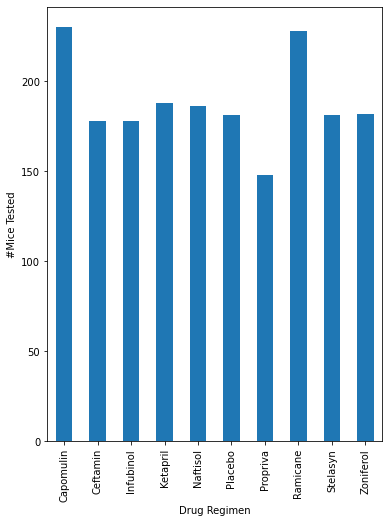

<Figure size 432x288 with 0 Axes>

In [87]:
#Plot Chart 01
tp_chart = bar_total_tp.plot(kind='bar', figsize=(6,8))

#Plot Labels
tp_chart.set_xlabel("Drug Regimen")
tp_chart.set_ylabel("#Mice Tested")

plt.show()
plt.tight_layout()

Text(0, 0.5, 'Number of Mice')

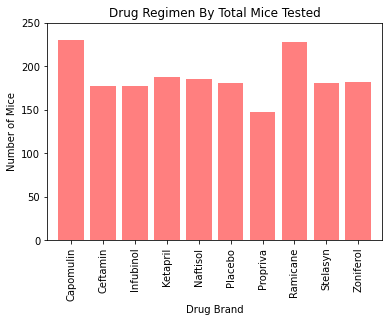

In [88]:
#Plot Chart 02
drug_mice = [230, 178, 178, 188, 186, 181, 148, 228, 181, 182]
x_axis = np.arange(len(drug_mice))
plt.bar(x_axis, drug_mice, color='r', alpha=0.5, align="center")

#Plot Datat Labels
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"], rotation="vertical")

#Plot Limits
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(drug_mice)+20)

#Plot Labels
plt.title("Drug Regimen By Total Mice Tested")
plt.xlabel("Drug Brand")
plt.ylabel("Number of Mice")


In [89]:
# Pie Plot For Distribution of Female vs Male Mice
gender_dist=final_data.groupby("Sex")

gender_makeup=gender_dist[["Sex"]].count()
gender_makeup

,Sex
Sex,
Female,922
Male,958


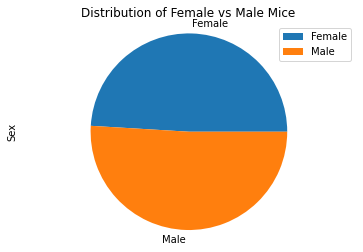

In [90]:
#Pie Chart Plot 01
gender_pie=gender_makeup.plot(kind="pie",y="Sex", title=("Distribution of Female vs Male Mice"))
gender_pie

plt.axis("equal")
plt.show()


In [91]:
#Pie Chart Plot 02
labels= ["Female", "Male"]

size = [922, 958]

colors= ["lightcoral", "lightskyblue"]

explode= (.15, 0)

([<matplotlib.patches.Wedge at 0x264d933f430>,
 [Text(-0.8319191227405521, -0.9329579696956293, 'Female'),
  Text(0.7320888280116862, 0.8210030133321533, 'Male')],
 [Text(-0.4991514736443312, -0.5597747818173775, '49.0%'),
  Text(0.39932117891546515, 0.4478198254539018, '51.0%')])

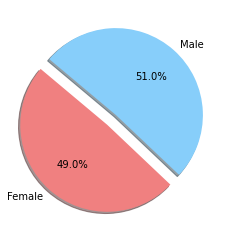

In [92]:
plt.pie(size, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

## Quartiles, Outliers and Boxplots

In [93]:
#Timepoint df
last_m=final_data.groupby(["Mouse ID"]).max()["Timepoint"]
last_m=last_m.reset_index(drop=False)
#Merged data
final_merge=pd.merge(final_data,last_m, on=["Mouse ID","Timepoint"])
final_merge


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
243,z314,Stelasyn,Female,21,28,5,45.934712,0
244,z435,Propriva,Female,12,26,10,48.710661,0
245,z581,Infubinol,Female,24,25,45,62.754451,3
246,z795,Naftisol,Female,13,29,45,65.741070,3


In [94]:
final_merge.loc[final_merge["Drug Regimen"]=="Capomulin","Tumor Volume (mm3)"]

1      23.343598
2      28.484033
3      28.430964
6      30.485985
10     31.023923
12     31.896238
13     32.377357
14     33.329098
16     34.455298
20     37.311846
22     36.041047
24     37.074024
28     38.846876
30     38.939633
31     38.982878
32     38.753265
34     38.125164
35     39.952347
36     40.658124
37     40.159220
38     40.728578
39     41.483008
40     41.581521
45     47.685963
180    46.539206
Name: Tumor Volume (mm3), dtype: float64

In [95]:
#For Loop to Collect Drug Results
drug_set=[] 

for drug in ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]:
    tv3=final_merge.loc[final_merge["Drug Regimen"]==drug,"Tumor Volume (mm3)"]
    drug_set.append(tv3)


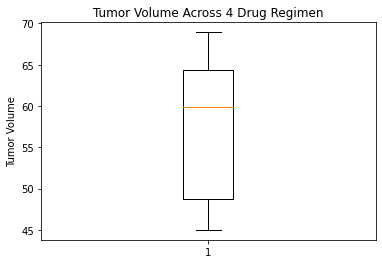

In [96]:
#Box Plot
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume Across 4 Drug Regimen')
ax1.set_ylabel('Tumor Volume')
ax1.boxplot(tv3)
plt.show()

In [128]:
#Quartiles
quartiles = tv3.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of tumor volume is: {lowerq}")
print(f"The upper quartile of tumor volume is: {upperq}")
print(f"The interquartile range of tumor volume is: {iqr}")
print(f"The the median of tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of tumor volume is: 48.72207785
The upper quartile of tumor volume is: 64.29983003
The interquartile range of tumor volume is: 15.577752179999997
The the median of tumor volume is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


## Line and Scatter Plots

In [98]:
#Isolating Drug Regimen Capomulin
capo_data=final_data.loc[final_data["Drug Regimen"]=="Capomulin"]
capo_data.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


In [99]:
#Isolating Mouse ID: S185
capo_mice=capo_data.loc[capo_data["Mouse ID"]== "s185"]
capo_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


In [104]:
#Tumor Volume Variable
capo_tv=capo_mice["Tumor Volume (mm3)"]

In [105]:
#Timepoint Variable
capo_tp=capo_mice["Timepoint"]

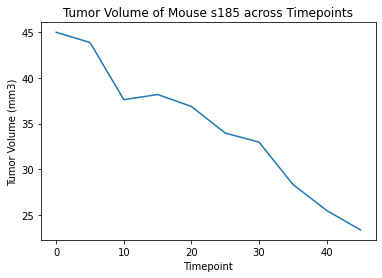

In [102]:
#Line Plot
plt.plot(capo_tp, capo_tv)
plt.title("Tumor Volume of Mouse s185 across Timepoints")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

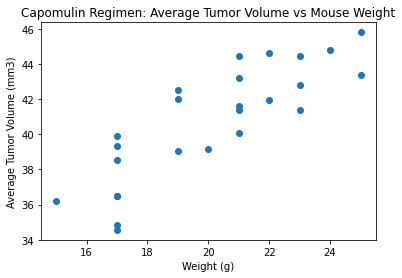

In [117]:
#Scatter Plot
capo_avg=capo_data.groupby(['Mouse ID']).mean()

plt.scatter(capo_avg['Weight (g)'],capo_avg['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title ('Capomulin Regimen: Average Tumor Volume vs Mouse Weight')
plt.savefig('scatterplot')
plt.show()

## Correlation and Regression

In [121]:
#Line Regression Variable
capo_lin=st.linregress(capo_avg['Weight (g)'], capo_avg['Tumor Volume (mm3)'])
capo_lin

LinregressResult(slope=0.9544396890241049, intercept=21.552160532685008, rvalue=0.8419363424694721, pvalue=1.3225722434712404e-07, stderr=0.12754359033201323, intercept_stderr=2.5909876867683455)

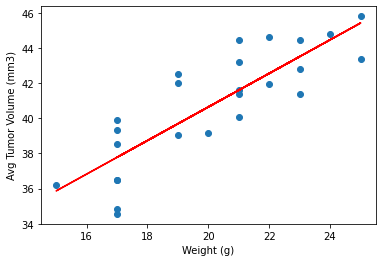

In [127]:
#Line Regression Plot
slope=0.9544396890241049
intercept=21.552160532685008
line = slope*(capo_avg['Weight (g)'])+intercept
plt.scatter(capo_avg['Weight (g)'],capo_avg['Tumor Volume (mm3)'])
plt.plot(capo_avg['Weight (g)'], line, 'r')

plt.xlabel('Weight (g)')
plt.ylabel('Avg Tumor Volume (mm3)')

plt.savefig('LineR')
plt.show()